<a href="https://www.kaggle.com/code/nurillaht/sibi-model?scriptVersionId=243816319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Library

In [1]:
# install tensorflowjs
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible

In [2]:
# import libraries
import os
import io
import gdown
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

2025-06-05 04:11:38.852587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749096699.067990      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749096699.130643      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Get Dataset 

In [3]:
# download zip file dataset from url

# SIBI datasets : https://drive.google.com/file/d/1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv/view?usp=sharing
!gdown 1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv

Downloading...
From (original): https://drive.google.com/uc?id=1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv
From (redirected): https://drive.google.com/uc?id=1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv&confirm=t&uuid=d20075c8-35d7-4099-a433-13bfd7497c12
To: /kaggle/working/SIBI_datasets.zip
100%|████████████████████████████████████████| 780M/780M [00:28<00:00, 27.0MB/s]


In [4]:
# unzip dataset
!unzip SIBI_datasets.zip

Archive:  SIBI_datasets.zip
   creating: SIBI_datasets/
   creating: SIBI_datasets/val/
   creating: SIBI_datasets/val/U/
  inflating: SIBI_datasets/val/U/2871.jpg  
  inflating: SIBI_datasets/val/U/2555.jpg  
  inflating: SIBI_datasets/val/U/U2579.jpg  
  inflating: SIBI_datasets/val/U/U2807.jpg  
  inflating: SIBI_datasets/val/U/U2395.jpg  
  inflating: SIBI_datasets/val/U/590.jpg  
  inflating: SIBI_datasets/val/U/U1446.jpg  
  inflating: SIBI_datasets/val/U/U884.jpg  
  inflating: SIBI_datasets/val/U/2455.jpg  
  inflating: SIBI_datasets/val/U/U774.jpg  
  inflating: SIBI_datasets/val/U/U2062.jpg  
  inflating: SIBI_datasets/val/U/U208.jpg  
  inflating: SIBI_datasets/val/U/U1617.jpg  
  inflating: SIBI_datasets/val/U/2385.jpg  
  inflating: SIBI_datasets/val/U/U190.jpg  
  inflating: SIBI_datasets/val/U/U107.jpg  
  inflating: SIBI_datasets/val/U/2966.jpg  
  inflating: SIBI_datasets/val/U/U289.jpg  
  inflating: SIBI_datasets/val/U/U1612.jpg  
  inflating: SIBI_datasets/val/U/U25

In [5]:
# delete zip file
file_path = '/kaggle/working/SIBI_datasets.zip'
if os.path.exists(file_path):
    os.remove(file_path)
    print("File SIBI_datasets.zip deleted successfully.")
else:
    print("File SIBI_datasets.zip doesn't exist.")

File SIBI_datasets.zip deleted successfully.


## Dataset Distribution

In [6]:
# show dataset distribution
data_dir = '/kaggle/working/SIBI_datasets'

data = []
split_folders = ([name for name in os.listdir(data_dir)])

for split in split_folders:
    alphabets = sorted(os.listdir(os.path.join(data_dir, split)))
    for alphabet in alphabets:
        img_files = os.listdir(os.path.join(data_dir,split,alphabet))
        num_imgs = len(img_files)
        data.append({'Folder': split, 'Alfabet': alphabet, 'Jumlah': num_imgs})

df = pd.DataFrame(data)

print("-- Distribusi SIBI Dataset --\n")
x = df.pivot(index='Alfabet', columns='Folder', values='Jumlah').reset_index()
x.columns.name = None
print(x)

# grouped data distribution by folder
groupby_df = df.groupby('Folder').agg({'Jumlah': 'sum'}).reset_index()

print(f"\n{groupby_df}")
print(f"\nTotal gambar: {groupby_df['Jumlah'].sum()}")

-- Distribusi SIBI Dataset --

   Alfabet  test  train  val
0        A   100    800  100
1        B   100    800  100
2        C   100    800  100
3        D   100    800  100
4        E   100    800  100
5        F   100    800  100
6        G   100    800  100
7        H   100    800  100
8        I   100    800  100
9        J   100    800  100
10       K   100    800  100
11       L   100    800  100
12       M   100    800  100
13       N   100    800  100
14       O   100    800  100
15       P   100    800  100
16       Q   100    800  100
17       R   100    800  100
18       S   100    800  100
19       T   100    800  100
20       U   100    800  100
21       V   100    800  100
22       W   100    800  100
23       X   100    800  100
24       Y   100    800  100
25       Z   100    800  100

  Folder  Jumlah
0   test    2600
1  train   20800
2    val    2600

Total gambar: 26000


# Load and Preprocess Dataset

In [7]:
# load and preprocess dataset
image_size = (224, 224)
batch_size = 32

train_dir = os.path.join(data_dir, 'train')
val_dir =  os.path.join(data_dir, 'val')
test_dir =  os.path.join(data_dir, 'test')

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                          label_mode='categorical',
                                                          image_size=image_size,
                                                          batch_size=batch_size,
                                                          shuffle=True,
                                                          seed=42)


val_data = tf.keras.utils.image_dataset_from_directory(directory=val_dir,
                                                        label_mode='categorical',
                                                        image_size=image_size,
                                                        batch_size=batch_size,
                                                        shuffle=False)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode='categorical',
                                                        image_size=image_size,
                                                        batch_size=1,
                                                        shuffle=False)

num_classes = len(train_data.class_names)
class_names = train_data.class_names

print(f"\nClasses {num_classes}: {class_names}")

Found 20800 files belonging to 26 classes.


I0000 00:00:1749096759.063148      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749096759.063872      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 2600 files belonging to 26 classes.
Found 2600 files belonging to 26 classes.

Classes 26: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Data Augmentation Layer

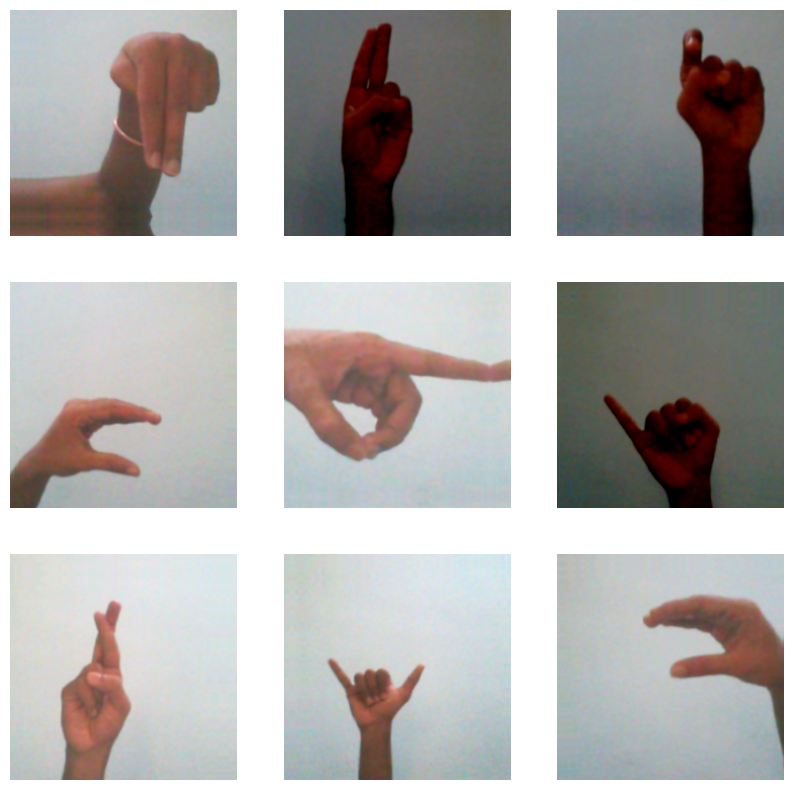

In [8]:
# data augmentation layer
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomZoom(0.2),
                                         tf.keras.layers.RandomRotation(0.03),
                                         tf.keras.layers.RandomTranslation(0.1, 0.1),
                                         tf.keras.layers.RandomBrightness([-0.3,0.3]),
                                         tf.keras.layers.RandomContrast(0.2),
                                         tf.keras.layers.RandomFlip("horizontal")])


# augmentation function
def apply_augment(image, label):
    image = data_augmentation(image, training=True)
    return image, label

# apply augmentation to train_data
train_data_augmented = train_data.map(apply_augment, num_parallel_calls=tf.data.AUTOTUNE)

# show example of augmentated images
for image, _ in train_data_augmented.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    display_image = image[i]
    plt.imshow(display_image / 255)
    plt.axis('off')
      
# optimize dataset performance
train_data_augmented = train_data_augmented.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Help Functions

## Create Model for Transfer Learning

In [9]:
# select base model
def base_models(base):
    if base == 'resnet':
        print("> Instantiating ResNet50 model...")
        base_model = tf.keras.applications.ResNet50(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
        base_model.trainable = False
        
        preprocess_input = tf.keras.applications.resnet.preprocess_input
        
    elif base == 'densenet':
        print("> Instantiating DenseNet121 model...")
        base_model = tf.keras.applications.DenseNet121(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
        base_model.trainable = False
        
        preprocess_input = tf.keras.applications.densenet.preprocess_input
        
    elif base == 'mobilenetv2':
        print("> Instantiating MobileNetV2 model...")
        base_model = tf.keras.applications.MobileNetV2(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
        base_model.trainable = False
        
        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
    else:
        message = "ERROR: Base model is not available."
        return message
    return base_model, preprocess_input
    
# create transfer learning model 
def custom_tlmodel(num_classes, base, dense_layer_units=None):
    base_model, preprocess_input = base_models(base)
        
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if dense_layer_units:
        print(f"Adding additional dense layers with units: {dense_layer_units}")
        for units in dense_layer_units:
            x = tf.keras.layers.Dense(units, activation='relu')(x)
                
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    
    model.summary(show_trainable=True)

    print(f"\nCreate model with base model: {base}, dense layer: {dense_layer_units}, classes: {num_classes}")
    
    return model

## Model Training and Visualization 

In [10]:
# compile and train model
def train_model(model, train_data_augmented, val_data, epoch):       
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                       patience=3,verbose=1, min_lr=0.0)

    print("\n> Start model training...\n")
    history = model.fit(train_data_augmented,
                          validation_data=val_data,
                          epochs=epoch,
                          verbose=1,
                          callbacks=[lr_callback])
    print("\n> Model training completed.\n")
    return model, history

# visualize model training history
def visualize_history(history):        
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # plot acuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Train Acc')
    plt.plot(val_accuracy, label='Val Acc')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

## Model Evaluation

In [11]:
# evaluate model accuracy on test_data
def evaluate_model(model, test_data):
    print("\n> Evaluating model...")
    testLoss, testAcc = model.evaluate(test_data, verbose=1)
    print(f'Accuracy on test data: {testAcc:.4f}')
    print(f'Loss on test data: {testLoss:.4f}')

# use model to make prediction on test_data
def predict_model(model, test_data, class_names):
    print("\n> Predicting images in test_data...")
    predictions = model.predict(test_data, verbose=1)
    predicted_indices = tf.argmax(predictions, axis=1).numpy()
    
    # get predicted labels
    predicted_labels = []
    for predicted_class_index in predicted_indices:
        predicted_label_name = class_names[predicted_class_index]
        predicted_labels.append(predicted_label_name)

    # get true labels
    true_labels = []
    for images, labels in test_data:
        for one_hot_label in labels.numpy():
            class_index = tf.argmax(one_hot_label).numpy()
            true_label_name = class_names[class_index]
            true_labels.append(true_label_name)
    return true_labels, predicted_labels

# visualize confusion matrix
def visualize_prediction(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10,8))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=18, pad=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# print model performance evaluation
def print_evaluation(model, test_data, class_names):
    evaluate_model(model, test_data)
    true_labels, predicted_labels = predict_model(model, test_data, class_names)
    print("\n> Print Classification Report :")
    print(classification_report(true_labels, predicted_labels))
    visualize_prediction(true_labels, predicted_labels, class_names)

## Save Model and Convert Model to TensorFlow.js

In [12]:
# save model and convert model to TensorFlow.js
def save_convert_model(model, model_name, model_extentions):
    # create directory for saved model
    saved_model_path = 'saved_models/'
    os.makedirs(saved_model_path, exist_ok=True)
    
    # save model with various extentions        
    for extention in model_extentions:
        saved_model_file = os.path.join(saved_model_path, f"{model_name}.{extention}")
        print("\n----------------------------------------------------------------------------")
        if extention == "pkl":
            try:
                print(f"\n> Saving model '{saved_model_file}'...")
                joblib.dump(model, saved_model_file)
                print(f"Model: '{saved_model_file}' saved successfully.")
            except Exception as e:
                print(f"ERROR: Failed to save model.\nDetails : {e}")
        else:    
            try:
                print(f"\n> Saving model '{saved_model_file}'...")
                model.save(saved_model_file)
                print(f"Keras model: '{saved_model_file}' saved successfully.")
            except Exception as e:
                print(f"ERROR: Failed to save model.\nDetails : {e}")
                
    print("\n----------------------------------------------------------------------------")
    # create directory for tfjs model
    tfjs_path = 'tfjs_models/'
    tfjs_output_dir = os.path.join(tfjs_path, model_name)
    os.makedirs(tfjs_output_dir, exist_ok=True)

    # convert model to tfjs format
    try:
        print(f"\n> Converting '{model_name}' model to TensorFlow.js...")
        tfjs.converters.save_keras_model(model, tfjs_output_dir)
        print(f"Model successfully converted to tfjs and saved at: '{tfjs_output_dir}'")
    except Exception as e:
        print(f"ERROR: Failed to convert the model to tfjs.\nDetails: {e}")
    print("\n----------------------------------------------------------------------------")

## Images Prediction

In [13]:
image_directory = '/kaggle/input/new-predict'

# use model to predict new images
def predict_images(model_name, model_extentions, class_names, image_directory):
    # load models
    for extention in model_extentions: 
        model_path_dir = os.path.join('saved_models/', f"{model_name}.{extention}")
        print("\n========================================================================")
        print(f"\n> Attempting to load model from '{model_path_dir}'...")
        
        if extention == "pkl":
            try:
                # load from joblib model
                model = joblib.load(model_path_dir)
                print(f"Model: '{model_path_dir}' loaded successfully")
            except Exception as e:
                print(f"ERROR: Failed to load model.\nDetails: {e}")
                continue
        else:
            try:
                # Load from TensorFlow model
                model = tf.keras.models.load_model(model_path_dir)
                print(f"Model: '{model_path_dir}' loaded successfully")
            except Exception as e:
                print(f"ERROR: Failed to load model.\nDetails: {e}")
                continue
        
        print(f"\n>>> Running prediction with '{model_path_dir}'...")    
        print(f"\nSearching for images in: '{image_directory}'")

        # check image directory
        if not os.path.isdir(image_directory):
            print(f"ERROR: Directory '{image_directory}' not found.")
            return
    
        # list all files in image directory
        image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
        if not image_files:
            print(f"ERROR: No image files found in '{image_directory}'.")
            return
            
        print(f"Found {len(image_files)} image(s).")

        # predict images
        for count, image_file in enumerate(image_files, 1):
            image_path = os.path.join(image_directory, image_file)
            
            # preprocess the image
            print(f"\n\n--- Preprocessing image {count}/{len(image_files)}: '{image_path}' ---")
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)

            # show image
            plt.figure(figsize=(3, 3))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        
            print("> Making prediction...")
            predictions = model.predict(img_array)
    
            # get the top 3 predicted class indices and confidences
            top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    
            print(f"\nTop 3 Prediction Results for '{image_file}'")
            for i, predicted_index in enumerate(top_3_indices):
                predicted_class = class_names[predicted_index]
                confidence = predictions[0][predicted_index] * 100
                print(f"  {i+1}. {predicted_class}: {confidence:.2f}")
    print("\n========================================================================")

# Pre-trained Base Model

## ResNet50

> Instantiating ResNet50 model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_2          │ (None, 224, 224, 3)  │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ get_item (GetItem)     │ (None, 224, 224)     │            0 │ input_layer_2[0][0] │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ get_item_1 (GetItem)   │ (None, 224, 224)     │            0 │ input_layer_2[0][0] │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ get_item_2 (GetItem)   │ (None, 224, 224)     │            0 │ input_layer_2[0][0] │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ stack (Stack)          │ (None, 224, 224, 3)  │            0 │ get_item[0][0],     │    -    │
│                        │                      │              │ get_item_1[0][0],   │         │
│                        │                      │              │ get_item_2[0][0]    │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ add (Add)              │ (None, 224, 224, 3)  │            0 │ stack[0][0]         │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ resnet50 (Functional)  │ (None, 7, 7, 2048)   │   23,587,712 │ add[0][0]           │    N    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ global_average_poolin… │ (None, 2048)         │            0 │ resnet50[0][0]      │    -    │
│ (GlobalAveragePooling… │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dense (Dense)          │ (None, 26)           │       53,274 │ global_average_poo… │    Y    │
└────────────────────────┴──────────────────────┴──────────────┴─────────────────────┴─────────┘

 Total params: 23,640,986 (90.18 MB)

 Trainable params: 53,274 (208.10 KB)

 Non-trainable params: 23,587,712 (89.98 MB)


Create model with base model: resnet, dense layer: None, classes: 26

> Start model training...

Epoch 1/10


I0000 00:00:1749096777.916731      76 service.cc:148] XLA service 0x7ca5fc0021e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749096777.917654      76 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749096777.917677      76 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749096779.637168      76 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/650 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.0078 - loss: 3.7916       

I0000 00:00:1749096784.022204      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


650/650 ━━━━━━━━━━━━━━━━━━━━ 158s 218ms/step - accuracy: 0.4744 - loss: 2.1935 - val_accuracy: 0.9642 - val_loss: 0.6044 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.9678 - loss: 0.4890 - val_accuracy: 0.9831 - val_loss: 0.2750 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.9872 - loss: 0.2392 - val_accuracy: 0.9865 - val_loss: 0.1662 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.9923 - loss: 0.1482 - val_accuracy: 0.9900 - val_loss: 0.1143 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.9947 - loss: 0.1023 - val_accuracy: 0.9915 - val_loss: 0.0846 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.9966 - loss: 0.0750 - val_accuracy: 0.9923 - val_loss: 0.0657 - learning_rate: 1.0000e-04
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accur

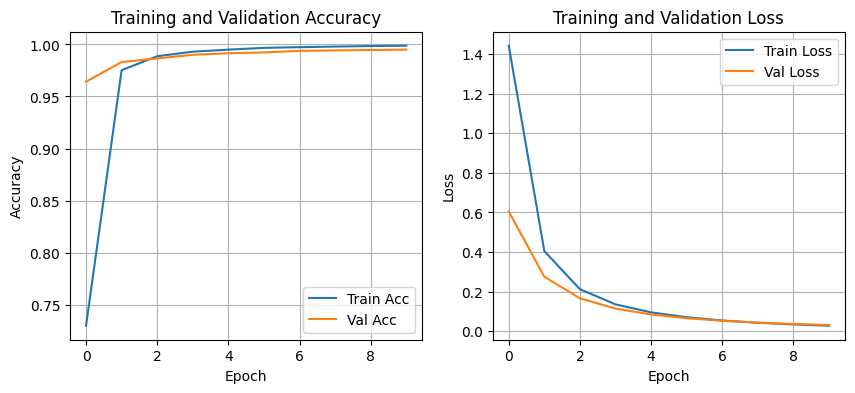


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9997 - loss: 0.0214
Accuracy on test data: 0.9981
Loss on test data: 0.0303

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      1.00      1.00       100
           D       1.00      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       1.00      1.00      1.00       100
           H       1.00      1.00      1.00       100
           I       1.00      1.00      1.00       100
           J       1.00      1.00      1.00       100
           K       0.99      1.00      1.00       100
           L       1.00      1.00      1.00       100
           M       1.00   

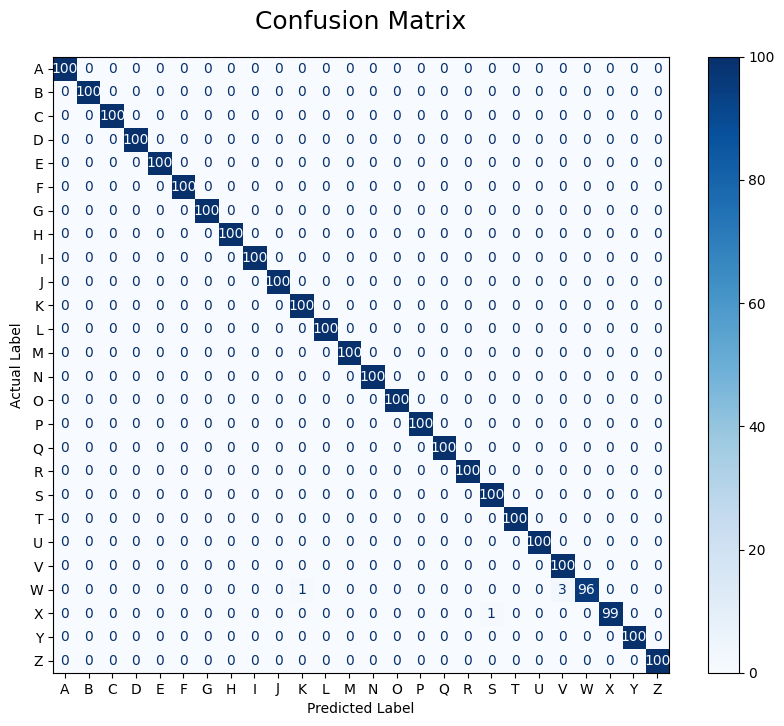

In [14]:
resnet_base = custom_tlmodel(num_classes, base='resnet', dense_layer_units=None)
resnet_ori, resnet_ori_history = train_model(resnet_base, train_data_augmented, val_data, epoch=10)
visualize_history(resnet_ori_history)
print_evaluation(resnet_ori, test_data, class_names)

In [15]:
save_convert_model(resnet_ori, 'resnet', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/resnet.pkl'...
Model: 'saved_models/resnet.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/resnet.h5'...
Keras model: 'saved_models/resnet.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/resnet.keras'...
Keras model: 'saved_models/resnet.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'resnet' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/resnet'

----------------------------------------------------------------------------




> Attempting to load model from 'saved_models/resnet.pkl'...
Model: 'saved_models/resnet.pkl' loaded successfully

>>> Running prediction with 'saved_models/resnet.pkl'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


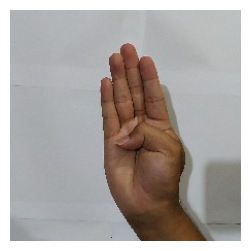

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Top 3 Prediction Results for 'B (4).jpg'
  1. E: 64.44
  2. B: 20.96
  3. X: 4.78


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


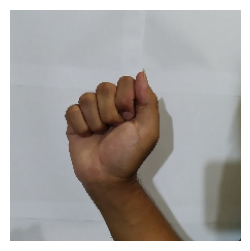

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. A: 56.98
  2. E: 19.08
  3. T: 11.96


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


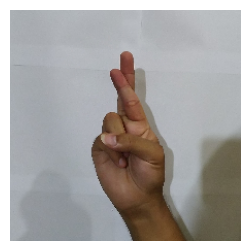

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. X: 27.28
  2. K: 22.07
  3. U: 14.54


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


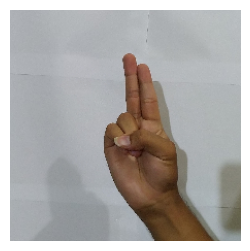

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 48.57
  2. X: 22.61
  3. G: 8.92


> Attempting to load model from 'saved_models/resnet.h5'...
ERROR: Failed to load model.
Details: Object of type ellipsis is not JSON serializable


> Attempting to load model from 'saved_models/resnet.keras'...
Model: 'saved_models/resnet.keras' loaded successfully

>>> Running prediction with 'saved_models/resnet.keras'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


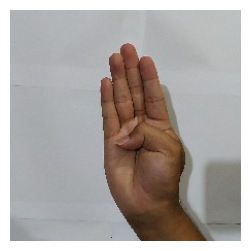

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Top 3 Prediction Results for 'B (4).jpg'
  1. E: 64.44
  2. B: 20.96
  3. X: 4.78


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


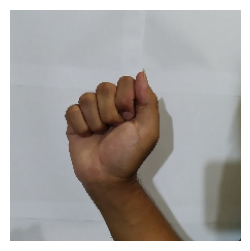

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. A: 56.98
  2. E: 19.08
  3. T: 11.96


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


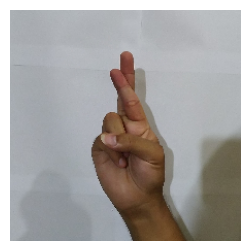

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. X: 27.28
  2. K: 22.07
  3. U: 14.54


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


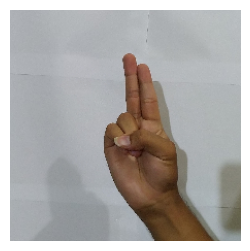

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 48.57
  2. X: 22.61
  3. G: 8.92



In [16]:
predict_images('resnet', ['pkl', 'h5', 'keras'], class_names, image_directory)

## DenseNet

> Instantiating DenseNet121 model...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_4 (InputLayer)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ true_divide (TrueDivide)            │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ add_1 (Add)                         │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ true_divide_1 (TrueDivide)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ densenet121 (Functional)            │ (None, 7, 7, 1024)           │     7,037,504 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d_1          │ (None, 1024)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 26)                   │        26,650 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 7,064,154 (26.95 MB)

 Trainable params: 26,650 (104.10 KB)

 Non-trainable params: 7,037,504 (26.85 MB)


Create model with base model: densenet, dense layer: None, classes: 26

> Start model training...

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 103s 111ms/step - accuracy: 0.2275 - loss: 2.9410 - val_accuracy: 0.8092 - val_loss: 1.7503 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.8712 - loss: 1.4489 - val_accuracy: 0.9346 - val_loss: 1.0072 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.9540 - loss: 0.8535 - val_accuracy: 0.9658 - val_loss: 0.6596 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.9750 - loss: 0.5718 - val_accuracy: 0.9765 - val_loss: 0.4691 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.9835 - loss: 0.4138 - val_accuracy: 0.9800 - val_loss: 0.3521 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.9877 - loss: 0.3143 - val_accuracy: 0.98

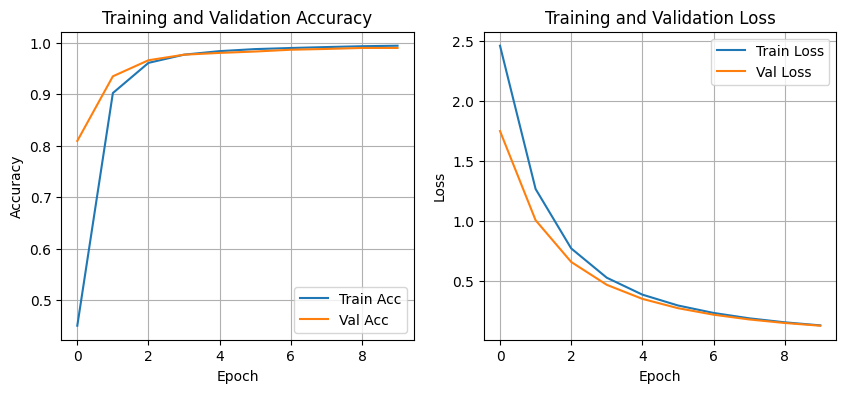


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9959 - loss: 0.1191
Accuracy on test data: 0.9912
Loss on test data: 0.1225

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      0.99      0.99       100
           D       1.00      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       0.98      1.00      0.99       100
           H       1.00      0.99      0.99       100
           I       1.00      0.99      0.99       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00       100
           L       1.00      0.99      0.99       100
           M       0.98   

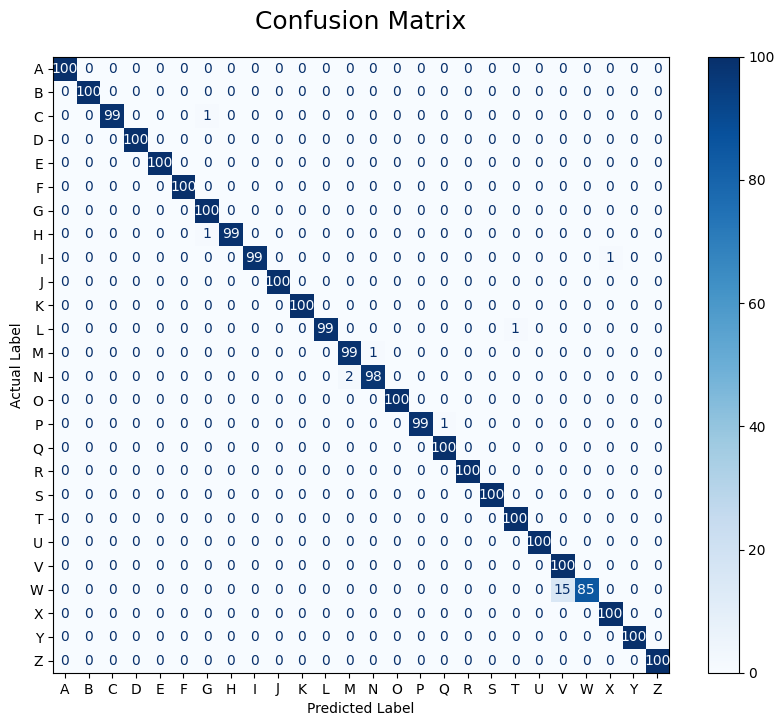

In [17]:
densenet_base = custom_tlmodel(num_classes, base='densenet', dense_layer_units=None)
densenet_ori, densenet_ori_history = train_model(densenet_base, train_data_augmented, val_data, epoch=10)
visualize_history(densenet_ori_history)
print_evaluation(densenet_ori, test_data, class_names)

In [18]:
save_convert_model(densenet_ori, 'densenet', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/densenet.pkl'...
Model: 'saved_models/densenet.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/densenet.h5'...
Keras model: 'saved_models/densenet.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/densenet.keras'...
Keras model: 'saved_models/densenet.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'densenet' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/densenet'

----------------------------------------------------------------------------




> Attempting to load model from 'saved_models/densenet.pkl'...
Model: 'saved_models/densenet.pkl' loaded successfully

>>> Running prediction with 'saved_models/densenet.pkl'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


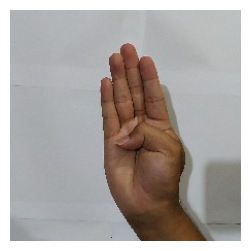

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step

Top 3 Prediction Results for 'B (4).jpg'
  1. E: 55.11
  2. X: 12.54
  3. B: 11.82


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


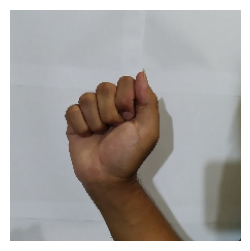

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. E: 36.19
  2. J: 23.51
  3. A: 8.56


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


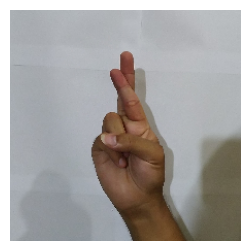

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. X: 92.32
  2. I: 5.63
  3. J: 1.05


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


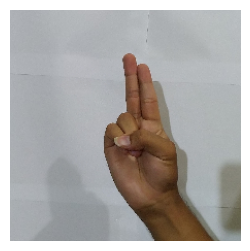

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. X: 49.71
  2. J: 22.64
  3. I: 9.08


> Attempting to load model from 'saved_models/densenet.h5'...
ERROR: Failed to load model.
Details: Unknown layer: 'TrueDivide'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


> Attempting to load model from 'saved_models/densenet.keras'...
Model: 'saved_models/densenet.keras' loaded successfully

>>> Running prediction with 'saved_models/densenet.keras'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


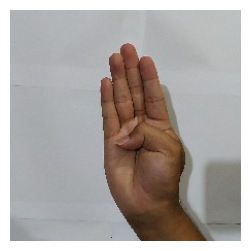

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step

Top 3 Prediction Results for 'B (4).jpg'
  1. E: 55.11
  2. X: 12.54
  3. B: 11.82


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


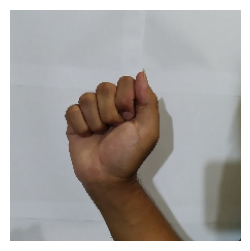

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. E: 36.19
  2. J: 23.51
  3. A: 8.56


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


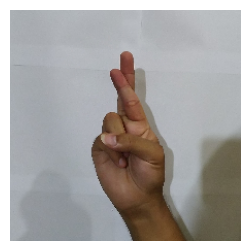

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. X: 92.32
  2. I: 5.63
  3. J: 1.05


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


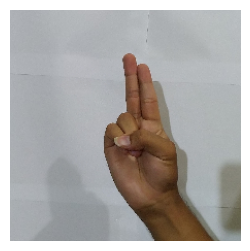

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. X: 49.71
  2. J: 22.64
  3. I: 9.08



In [19]:
predict_images('densenet', ['pkl', 'h5', 'keras'], class_names, image_directory)

## MobileNetv2

> Instantiating MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_6 (InputLayer)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ true_divide_2 (TrueDivide)          │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ subtract (Subtract)                 │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mobilenetv2_1.00_224 (Functional)   │ (None, 7, 7, 1280)           │     2,257,984 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d_2          │ (None, 1280)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 26)                   │        33,306 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 2,291,290 (8.74 MB)

 Trainable params: 33,306 (130.10 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Create model with base model: mobilenetv2, dense layer: None, classes: 26

> Start model training...

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.4726 - loss: 2.2386 - val_accuracy: 0.9592 - val_loss: 0.6097 - learning_rate: 1.0000e-04
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9676 - loss: 0.4665 - val_accuracy: 0.9827 - val_loss: 0.2748 - learning_rate: 1.0000e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9858 - loss: 0.2279 - val_accuracy: 0.9881 - val_loss: 0.1681 - learning_rate: 1.0000e-04
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9905 - loss: 0.1437 - val_accuracy: 0.9919 - val_loss: 0.1168 - learning_rate: 1.0000e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9932 - loss: 0.1012 - val_accuracy: 0.9938 - val_loss: 0.0870 - learning_rate: 1.0000e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9951 - loss: 0.0758 - val_accuracy: 0.9

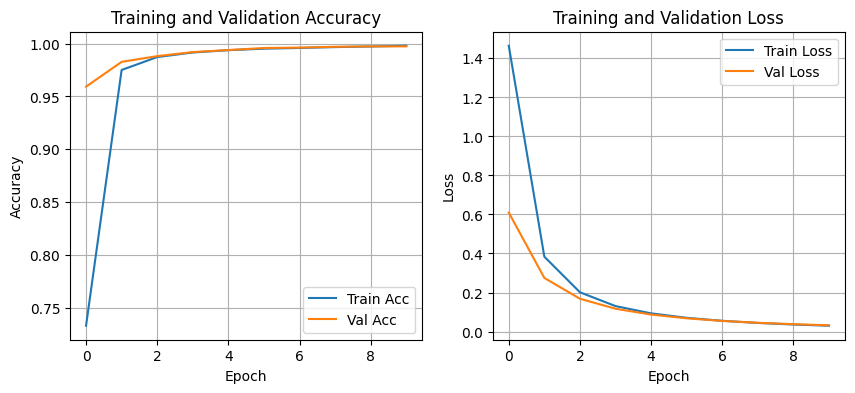


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9968 - loss: 0.0296
Accuracy on test data: 0.9954
Loss on test data: 0.0359

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       0.99      1.00      1.00       100
           D       1.00      1.00      1.00       100
           E       1.00      0.99      0.99       100
           F       1.00      0.99      0.99       100
           G       0.99      1.00      1.00       100
           H       1.00      0.99      0.99       100
           I       0.99      0.98      0.98       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00       100
           L       1.00      1.00      1.00       100
           M       0.99   

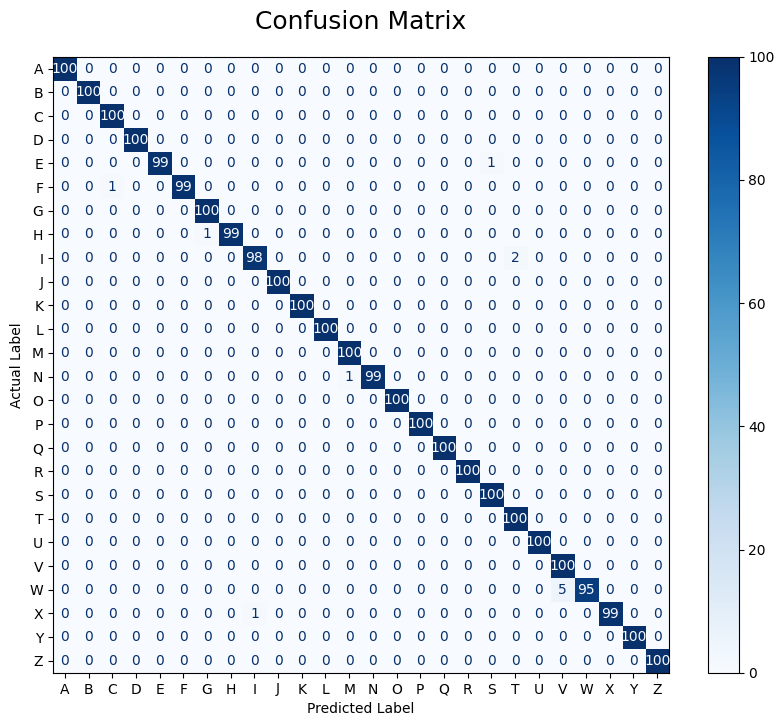

In [20]:
mobilenetv2_base = custom_tlmodel(num_classes, base='mobilenetv2', dense_layer_units=None)
mobilenetv2_ori, mobilenetv2_ori_history = train_model(mobilenetv2_base, train_data_augmented, val_data, epoch=10)
visualize_history(mobilenetv2_ori_history)
print_evaluation(mobilenetv2_ori, test_data, class_names)

In [21]:
save_convert_model(mobilenetv2_ori, 'mobilenetv2', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/mobilenetv2.pkl'...
Model: 'saved_models/mobilenetv2.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/mobilenetv2.h5'...
Keras model: 'saved_models/mobilenetv2.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/mobilenetv2.keras'...
Keras model: 'saved_models/mobilenetv2.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'mobilenetv2' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/mobilenetv2'

----------------------------------------------------------------------------




> Attempting to load model from 'saved_models/mobilenetv2.pkl'...
Model: 'saved_models/mobilenetv2.pkl' loaded successfully

>>> Running prediction with 'saved_models/mobilenetv2.pkl'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


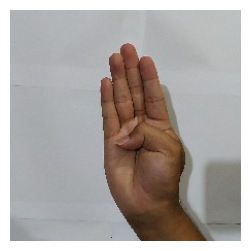

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Top 3 Prediction Results for 'B (4).jpg'
  1. B: 23.47
  2. E: 22.57
  3. K: 17.71


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


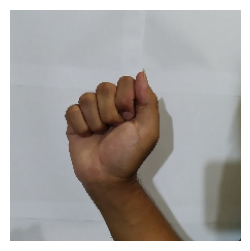

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. L: 31.09
  2. A: 24.12
  3. J: 22.32


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


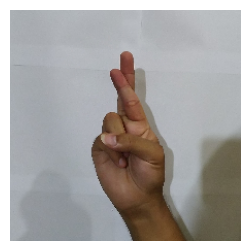

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. U: 49.17
  2. I: 20.47
  3. L: 16.61


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


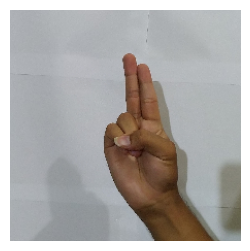

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 87.33
  2. L: 6.19
  3. K: 2.53


> Attempting to load model from 'saved_models/mobilenetv2.h5'...
ERROR: Failed to load model.
Details: Unknown layer: 'TrueDivide'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


> Attempting to load model from 'saved_models/mobilenetv2.keras'...
Model: 'saved_models/mobilenetv2.keras' loaded successfully

>>> Running prediction with 'saved_models/mobilenetv2.keras'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


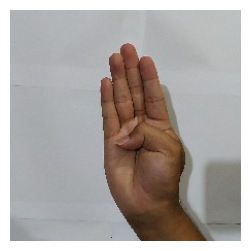

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Top 3 Prediction Results for 'B (4).jpg'
  1. B: 23.47
  2. E: 22.57
  3. K: 17.71


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


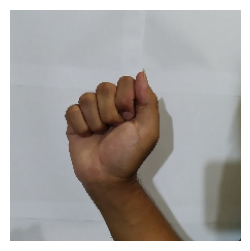

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. L: 31.09
  2. A: 24.12
  3. J: 22.32


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


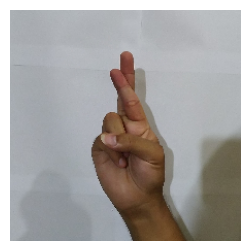

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. U: 49.17
  2. I: 20.47
  3. L: 16.61


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


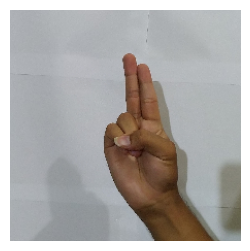

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 87.33
  2. L: 6.19
  3. K: 2.53



In [22]:
predict_images('mobilenetv2', ['pkl', 'h5', 'keras'], class_names, image_directory)

# CNN Model Architectures

In [23]:
cnn3 = tf.keras.Sequential([
              tf.keras.Input(shape=(224, 224, 3)),
              tf.keras.layers.Rescaling(1./255),
              tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(num_classes, activation='softmax')
            ])
cnn3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,946 (1.67 MB)

 Trainable params: 437,946 (1.67 MB)

 Non-trainable params: 0 (0.00 B)


> Start model training...

Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.1355 - loss: 2.9259 - val_accuracy: 0.6996 - val_loss: 0.9817 - learning_rate: 1.0000e-04
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.6453 - loss: 1.0572 - val_accuracy: 0.8654 - val_loss: 0.4249 - learning_rate: 1.0000e-04
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.8341 - loss: 0.4924 - val_accuracy: 0.9262 - val_loss: 0.2353 - learning_rate: 1.0000e-04
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9049 - loss: 0.2854 - val_accuracy: 0.9712 - val_loss: 0.1053 - learning_rate: 1.0000e-04
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9345 - loss: 0.1980 - val_accuracy: 0.9177 - val_loss: 0.2234 - learning_rate: 1.0000e-04
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9469 - loss: 0.1620 - val_accuracy: 0.9888 - val_loss: 0.0472 - learning_rate: 1.0000e-04
Epoch 7/20
650/650 ━━━━━

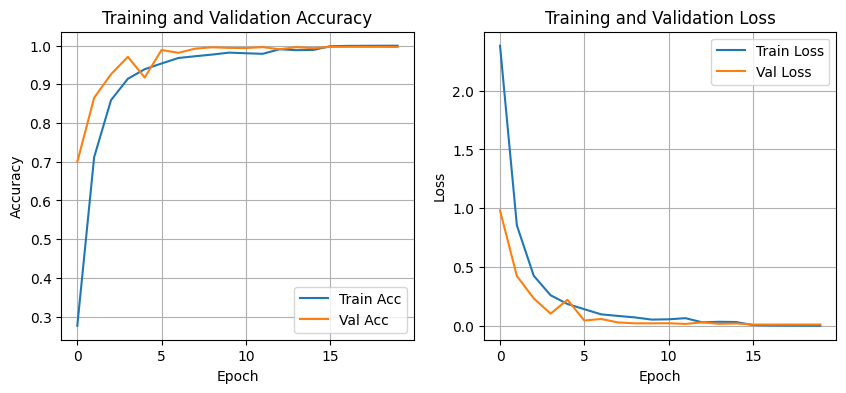


> Evaluating model...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9977 - loss: 0.0065
Accuracy on test data: 0.9977
Loss on test data: 0.0070

> Predicting images in test_data...
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

> Print Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      0.99      0.99       100
           D       1.00      1.00      1.00       100
           E       1.00      1.00      1.00       100
           F       1.00      1.00      1.00       100
           G       0.98      1.00      0.99       100
           H       1.00      0.99      0.99       100
           I       1.00      1.00      1.00       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00       100
           L       1.00      1.00      1.00       100
           M       1.00     

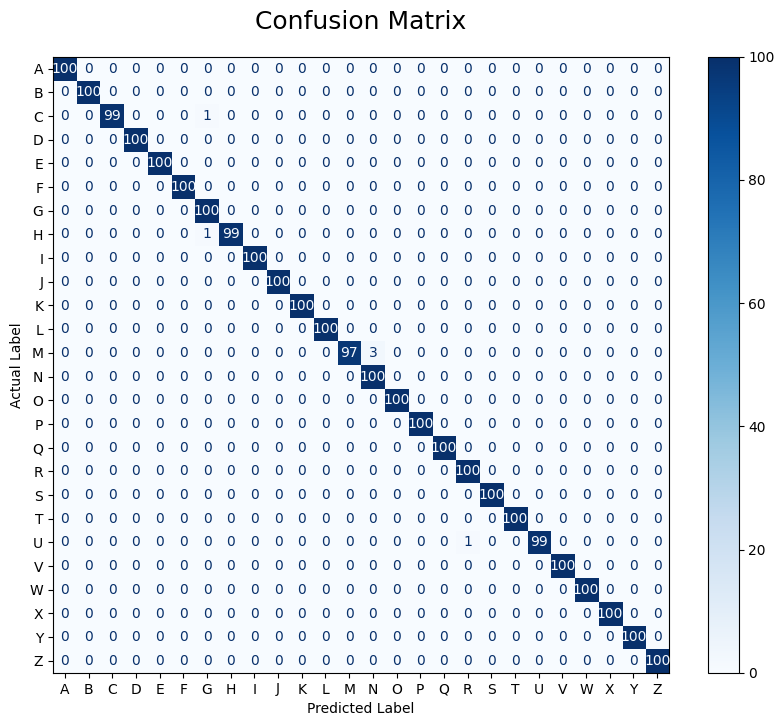

In [24]:
model_cnn3, model_cnn3_history = train_model(cnn3, train_data_augmented, val_data, epoch=20)
visualize_history(model_cnn3_history)
print_evaluation(model_cnn3, test_data, class_names)

In [25]:
save_convert_model(model_cnn3, 'cnn3', ['pkl', 'h5', 'keras'])


----------------------------------------------------------------------------

> Saving model 'saved_models/cnn3.pkl'...
Model: 'saved_models/cnn3.pkl' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/cnn3.h5'...
Keras model: 'saved_models/cnn3.h5' saved successfully.

----------------------------------------------------------------------------

> Saving model 'saved_models/cnn3.keras'...
Keras model: 'saved_models/cnn3.keras' saved successfully.

----------------------------------------------------------------------------

> Converting 'cnn3' model to TensorFlow.js...
failed to lookup keras version from the file,
    this is likely a weight only file
Model successfully converted to tfjs and saved at: 'tfjs_models/cnn3'

----------------------------------------------------------------------------




> Attempting to load model from 'saved_models/cnn3.pkl'...
Model: 'saved_models/cnn3.pkl' loaded successfully

>>> Running prediction with 'saved_models/cnn3.pkl'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


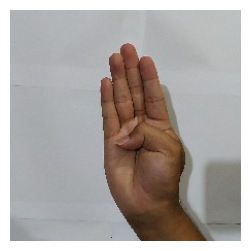

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

Top 3 Prediction Results for 'B (4).jpg'
  1. U: 100.00
  2. X: 0.00
  3. B: 0.00


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


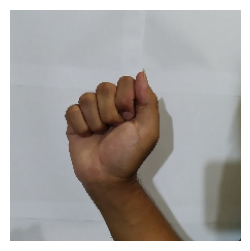

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. N: 94.87
  2. M: 4.61
  3. S: 0.27


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


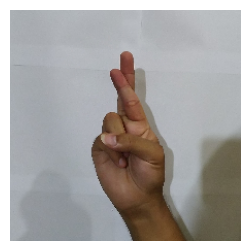

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. R: 100.00
  2. U: 0.00
  3. V: 0.00


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


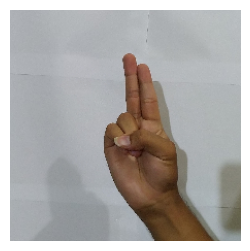

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 90.57
  2. R: 9.43
  3. X: 0.00


> Attempting to load model from 'saved_models/cnn3.h5'...
Model: 'saved_models/cnn3.h5' loaded successfully

>>> Running prediction with 'saved_models/cnn3.h5'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


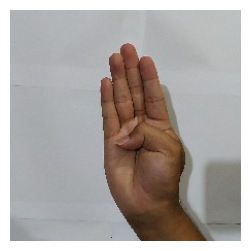

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step

Top 3 Prediction Results for 'B (4).jpg'
  1. U: 100.00
  2. X: 0.00
  3. B: 0.00


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


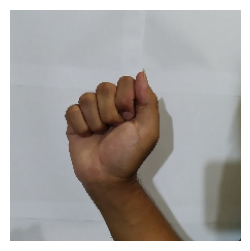

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. N: 94.87
  2. M: 4.61
  3. S: 0.27


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


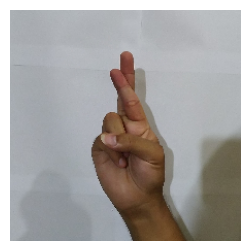

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. R: 100.00
  2. U: 0.00
  3. V: 0.00


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


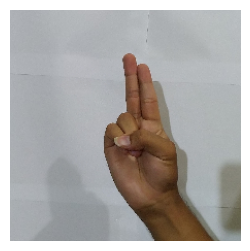

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 90.57
  2. R: 9.43
  3. X: 0.00


> Attempting to load model from 'saved_models/cnn3.keras'...
Model: 'saved_models/cnn3.keras' loaded successfully

>>> Running prediction with 'saved_models/cnn3.keras'...

Searching for images in: '/kaggle/input/new-predict'
Found 4 image(s).


--- Preprocessing image 1/4: '/kaggle/input/new-predict/B (4).jpg' ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


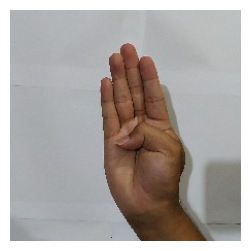

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

Top 3 Prediction Results for 'B (4).jpg'
  1. U: 100.00
  2. X: 0.00
  3. B: 0.00


--- Preprocessing image 2/4: '/kaggle/input/new-predict/A (4).jpg' ---


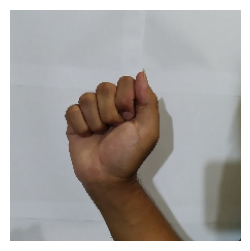

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Top 3 Prediction Results for 'A (4).jpg'
  1. N: 94.87
  2. M: 4.61
  3. S: 0.27


--- Preprocessing image 3/4: '/kaggle/input/new-predict/R (5).jpg' ---


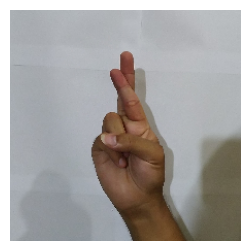

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Top 3 Prediction Results for 'R (5).jpg'
  1. R: 100.00
  2. U: 0.00
  3. V: 0.00


--- Preprocessing image 4/4: '/kaggle/input/new-predict/U (3).jpg' ---


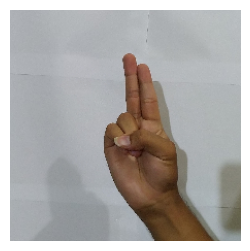

> Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Top 3 Prediction Results for 'U (3).jpg'
  1. U: 90.57
  2. R: 9.43
  3. X: 0.00



In [26]:
predict_images('cnn3', ['pkl', 'h5', 'keras'], class_names, image_directory)